In [1]:
import pandas as pd
import numpy as np

In [12]:
speeches = pd.read_parquet('src/Data/ecb-speeches.parquet')
releases = pd.read_csv("src/Data/ecb_releases_302.csv")
announcements = pd.read_csv("src/Data/policy_announcements.csv")

In [13]:
import os

def replace_newlines(text):
    return text.replace('\n', ' ')


announcements['content'] = announcements['content'].apply(replace_newlines)
announcements['date'] = pd.to_datetime(announcements['date'], errors='coerce')


In [14]:
# sort by date
announcements = announcements.sort_values(by='date', ascending=False)
announcements.reset_index(inplace=True, drop=True)
announcements.head(20)

,date,content
0,2023-05-04,4 May 2023 The inflation outlook continues to ...
1,2023-03-16,16 March 2023 Inflation is projected to remain...
2,2023-02-02,2 February 2023 The Governing Council will sta...
3,2022-12-15,15 December 2022 The Governing Council today d...
4,2022-10-27,27 October 2022 The Governing Council today de...
5,2022-09-08,8 September 2022 The Governing Council today d...
6,2022-07-21,"21 July 2022 Today, in line with the Governing..."
7,2022-06-09,9 June 2022 High inflation is a major challeng...
8,2022-04-14,14 April 2022 Russia’s aggression in Ukraine i...
9,2022-03-10,10 March 2022 The Russian invasion of Ukraine ...


In [5]:
from functions import descriptive_statistics_to_latex

latex_announc = descriptive_statistics_to_latex(announcements)
print(latex_announc)

2023-09-03 11:16:18.736366: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-03 11:16:18.778804: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-03 11:16:19.437400: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
 & Jan & Feb & Mar & Apr & May & Jun & Jul & Aug & Sep & Oct & Nov & Dec & Total \\
year &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
1999 & 0 & 0 & 2 & 2 & 2 & 2 & 3 & 1 & 2 & 2 & 2 & 1 & 19 \\
2000 & 2 & 2 & 3 & 2 & 2 & 2 & 2 & 2 & 1 & 2 & 3 & 1 & 24 \\
2001 & 2 & 2 & 3 & 2 & 2 & 2 & 2 & 2 & 3 & 2 & 1 & 1 & 24 \\
2002 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2003 & 1 & 1 & 1 & 1 & 1 & 1 & 2 & 0 & 1 & 1 & 1 & 1 & 12 \\
2004 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2005 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2006 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 2 & 0 & 1 & 1 & 1 & 12 \\
2007 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2008 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 2 & 1 & 1 & 13 \\
2009 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2010 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2011 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 12 \\
2012 & 1 & 1 & 1 & 1 & 1 &

In [15]:
# join the cells where date is the same
announcements = announcements.groupby('date')['content'].apply(' '.join).reset_index()
announcements

,date,content
0,1999-03-04,At today's meeting the Governing Council revie...
1,1999-03-18,At today's meeting the Governing Council of th...
2,1999-04-08,At today's meeting the Governing Council of th...
3,1999-04-22,"At today's meeting, the Governing Council of t..."
4,1999-05-06,At today's meeting the Governing Council of th...
...,...,...
287,2022-10-27,27 October 2022 The Governing Council today de...
288,2022-12-15,15 December 2022 The Governing Council today d...
289,2023-02-02,2 February 2023 The Governing Council will sta...
290,2023-03-16,16 March 2023 Inflation is projected to remain...


# Text similarity with Word2Vec


In [6]:
announcements

,date,content,year,month
0,2023-05-04,4 May 2023 The inflation outlook continues to ...,2023,5
1,2023-03-16,16 March 2023 Inflation is projected to remain...,2023,3
2,2023-02-02,2 February 2023 The Governing Council will sta...,2023,2
3,2022-12-15,15 December 2022 The Governing Council today d...,2022,12
4,2022-10-27,27 October 2022 The Governing Council today de...,2022,10
...,...,...,...,...
289,1999-05-06,At today's meeting the Governing Council of th...,1999,5
290,1999-04-22,"At today's meeting, the Governing Council of t...",1999,4
291,1999-04-08,At today's meeting the Governing Council of th...,1999,4
292,1999-03-18,At today's meeting the Governing Council of th...,1999,3


In [16]:
# remove the stopwords and punctuation
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download the stopwords
nltk.download('stopwords')

# Download the punctuation
nltk.download('punkt')

# Step 1: Text Preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

announcements['content_clean'] = announcements['content'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ozodbek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
announcements

,date,content,content_clean
0,1999-03-04,At today's meeting the Governing Council revie...,todays meeting governing council reviewed late...
1,1999-03-18,At today's meeting the Governing Council of th...,todays meeting governing council ecb reviewed ...
2,1999-04-08,At today's meeting the Governing Council of th...,todays meeting governing council ecb took foll...
3,1999-04-22,"At today's meeting, the Governing Council of t...",todays meeting governing council ecb took foll...
4,1999-05-06,At today's meeting the Governing Council of th...,todays meeting governing council ecb decided i...
...,...,...,...
287,2022-10-27,27 October 2022 The Governing Council today de...,27 october 2022 governing council today decide...
288,2022-12-15,15 December 2022 The Governing Council today d...,15 december 2022 governing council today decid...
289,2023-02-02,2 February 2023 The Governing Council will sta...,2 february 2023 governing council stay course ...
290,2023-03-16,16 March 2023 Inflation is projected to remain...,16 march 2023 inflation projected remain high ...


In [23]:
# Step 2: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer with regularization adjustments
tfidf_vectorizer = TfidfVectorizer()
"""min_df=0.01,  # Ignore words that appear in less than 1% of documents
                                   max_df=0.85,  # Ignore words that appear in more than 85% of documents
                                   sublinear_tf=True,
                                   smooth_idf=True)"""

tfidf_matrix = tfidf_vectorizer.fit_transform(announcements['content_clean'])



In [24]:
tfidf_matrix.shape

(292, 1396)

In [25]:
# Step 3: Calculate Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix)


avg_similarities = cosine_sim.sum(axis=1) - 1 # subtract 1 to exclude self-similarity
avg_similarities /= (cosine_sim.shape[0] - 1) # to get the average
announcements['avg_similarity'] = avg_similarities

In [26]:
announcements

,date,content,content_clean,avg_similarity
0,1999-03-04,At today's meeting the Governing Council revie...,todays meeting governing council reviewed late...,0.122086
1,1999-03-18,At today's meeting the Governing Council of th...,todays meeting governing council ecb reviewed ...,0.133329
2,1999-04-08,At today's meeting the Governing Council of th...,todays meeting governing council ecb took foll...,0.217194
3,1999-04-22,"At today's meeting, the Governing Council of t...",todays meeting governing council ecb took foll...,0.202018
4,1999-05-06,At today's meeting the Governing Council of th...,todays meeting governing council ecb decided i...,0.374013
...,...,...,...,...
287,2022-10-27,27 October 2022 The Governing Council today de...,27 october 2022 governing council today decide...,0.191447
288,2022-12-15,15 December 2022 The Governing Council today d...,15 december 2022 governing council today decid...,0.146045
289,2023-02-02,2 February 2023 The Governing Council will sta...,2 february 2023 governing council stay course ...,0.158277
290,2023-03-16,16 March 2023 Inflation is projected to remain...,16 march 2023 inflation projected remain high ...,0.139902


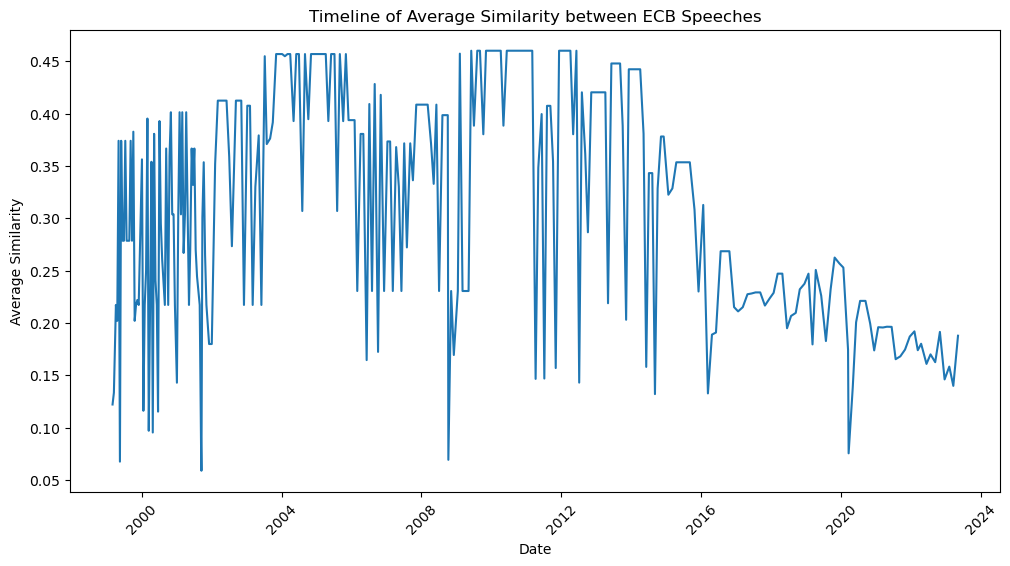

In [27]:
# plot the timeline of similarities
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the timeline of similarities
plt.plot(announcements['date'], announcements['avg_similarity'])

# Set the ticks and labels
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Average Similarity')
plt.title('Timeline of Average Similarity between ECB Speeches')
plt.show()


In [28]:
announcements['avg_similarity'].describe()

count    292.000000
mean       0.314009
std        0.110524
min        0.058824
25%        0.217194
50%        0.330947
75%        0.408544
max        0.460056
Name: avg_similarity, dtype: float64

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming tfidf_matrix is already computed using TfidfVectorizer

# Convert tfidf_matrix to numpy array
tfidf_array = tfidf_matrix.toarray()

# Last speech
last_speech_vector = tfidf_array[-1].reshape(1, -1)
similarity_last = cosine_similarity(tfidf_array, last_speech_vector)

# Last three speeches
last_three_vector = tfidf_array[-3:].mean(axis=0).reshape(1, -1)
similarity_last_three = cosine_similarity(tfidf_array, last_three_vector)

# Last five speeches
last_five_vector = tfidf_array[-5:].mean(axis=0).reshape(1, -1)
similarity_last_five = cosine_similarity(tfidf_array, last_five_vector)

announcements['similarity_last'] = similarity_last[:, 0]
announcements['similarity_last_three'] = similarity_last_three[:, 0]
announcements['similarity_last_five'] = similarity_last_five[:, 0]


In [10]:
announcements

,date,content
0,1999-03-04,At today's meeting the Governing Council revie...
1,1999-03-18,At today's meeting the Governing Council of th...
2,1999-04-08,At today's meeting the Governing Council of th...
3,1999-04-22,"At today's meeting, the Governing Council of t..."
4,1999-05-06,At today's meeting the Governing Council of th...
...,...,...
287,2022-10-27,27 October 2022 The Governing Council today de...
288,2022-12-15,15 December 2022 The Governing Council today d...
289,2023-02-02,2 February 2023 The Governing Council will sta...
290,2023-03-16,16 March 2023 Inflation is projected to remain...


# Word Embeddings

In [17]:
import pandas as pd
import nltk
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Load the dataset
data = announcements.copy()
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/ozodbek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ozodbek/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ozodbek/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
data

,date,content,content_clean
0,1999-03-04,At today's meeting the Governing Council revie...,todays meeting governing council reviewed late...
1,1999-03-18,At today's meeting the Governing Council of th...,todays meeting governing council ecb reviewed ...
2,1999-04-08,At today's meeting the Governing Council of th...,todays meeting governing council ecb took foll...
3,1999-04-22,"At today's meeting, the Governing Council of t...",todays meeting governing council ecb took foll...
4,1999-05-06,At today's meeting the Governing Council of th...,todays meeting governing council ecb decided i...
...,...,...,...
287,2022-10-27,27 October 2022 The Governing Council today de...,27 october 2022 governing council today decide...
288,2022-12-15,15 December 2022 The Governing Council today d...,15 december 2022 governing council today decid...
289,2023-02-02,2 February 2023 The Governing Council will sta...,2 february 2023 governing council stay course ...
290,2023-03-16,16 March 2023 Inflation is projected to remain...,16 march 2023 inflation projected remain high ...


In [25]:

# Train Word2Vec model
model = Word2Vec(sentences=data['content_clean'], vector_size=100, window=5, min_count=1, workers=4)
# model.save("ecb_word2vec.model")

# Example: Find similar words to "inflation"
similar_words = model.wv.most_similar("", topn=5)
print(similar_words)


KeyError: "Key '' not present in vocabulary"

In [23]:
if any(data['content_clean'].apply(lambda x: 'interest' in x)):
    print("'interest' exists in the processed dataset.")
else:
    print("'interest' does not exist in the processed dataset.")


'interest' exists in the processed dataset.


In [28]:
data['tokens'] = data['content_clean'].apply(word_tokenize)
print(data['tokens'].head())

0    [todays, meeting, governing, council, reviewed...
1    [todays, meeting, governing, council, ecb, rev...
2    [todays, meeting, governing, council, ecb, too...
3    [todays, meeting, governing, council, ecb, too...
4    [todays, meeting, governing, council, ecb, dec...
Name: tokens, dtype: object


In [29]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=data['tokens'])


In [30]:
vocab_size = len(model.wv.index_to_key)
print(f"Vocabulary size: {vocab_size}")
print(model.wv.index_to_key[:10])  # Print the first 10 words in the vocabulary


Vocabulary size: 562
['governing', 'council', 'ecb', 'interest', 'facility', 'today', 'rates', 'operations', 'refinancing', 'rate']


In [31]:
if "economy" in model.wv.index_to_key:
    similar_words = model.wv.most_similar("economy", topn=5)
    print(similar_words)
else:
    print("'economy' is not in the model's vocabulary.")


[('counter', 0.9995613098144531), ('market', 0.9995014071464539), ('year', 0.9994959235191345), ('december', 0.9994919300079346), ('area', 0.9994069337844849)]


In [42]:
import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Tokenize the content without preprocessing
data['tokens'] = data['content_clean'].apply(word_tokenize)

# Combine all tokens into a single list
all_tokens = [token for sublist in data['tokens'].tolist() for token in sublist]

# Find collocations
finder = BigramCollocationFinder.from_words(all_tokens)
bigram_measures = BigramAssocMeasures()
collocations = finder.nbest(bigram_measures.pmi, 50)  # top 50 collocations based on Pointwise Mutual Information


In [43]:
collocations

[('106', 'recorded'),
 ('1344', '5057'),
 ('49', '69'),
 ('5057', 'notes'),
 ('69', '1344'),
 ('91', 'august'),
 ('acts', 'fundamental'),
 ('adverse', 'geopolitical'),
 ('alleviate', 'working'),
 ('allocated', 'proportionally'),
 ('amid', 'exceptional'),
 ('announcing', 'reductions'),
 ('ascertain', 'whether'),
 ('averaging', '53'),
 ('back', 'production'),
 ('better', 'climate'),
 ('board', 'httpwwwfederalreservegov'),
 ('brdo', 'pri'),
 ('broadbased', 'secondround'),
 ('builtin', 'incentives'),
 ('causing', 'enormous'),
 ('commission', 'mr'),
 ('committed', 'playing'),
 ('committee', 'reacted'),
 ('consider', 'revising'),
 ('consultation', 'cooperated'),
 ('contact', 'stefan'),
 ('corporations', 'established'),
 ('deep', 'grief'),
 ('deepest', 'sympathy'),
 ('depends', 'severity'),
 ('develops', 'crucially'),
 ('dreadful', 'acts'),
 ('dysfunctions', 'outside'),
 ('ecb201921', 'amended'),
 ('either', 'direction'),
 ('eligibility', 'requirements'),
 ('enable', 'absorb'),
 ('engaged', '